In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('TitanicForDSSession.csv')

In [3]:
df.head()

,Unnamed: 0,Pclass,Sex,SibSp,Parch,Fare,Emb_Q,Emb_S,age_b,age_c,age_d,Survived
0,0,3,1,1,0,7.2500,0,1,0,0,0,0
1,1,1,0,1,0,71.2833,0,0,0,0,1,1
2,2,3,0,0,0,7.9250,0,1,1,0,0,1
3,3,1,0,1,0,53.1000,0,1,0,1,0,1
4,4,3,1,0,0,8.0500,0,1,0,1,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Emb_Q',
       'Emb_S', 'age_b', 'age_c', 'age_d', 'Survived'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Emb_Q       891 non-null int64
Emb_S       891 non-null int64
age_b       891 non-null int64
age_c       891 non-null int64
age_d       891 non-null int64
Survived    891 non-null int64
dtypes: float64(1), int64(10)
memory usage: 76.7 KB


In [43]:
sns.cm.mpl_cm

<module 'matplotlib.cm' from 'C:\\Users\\manoj\\Anaconda3\\lib\\site-packages\\matplotlib\\cm.py'>

Text(0.5, 1, 'Survived vs All')

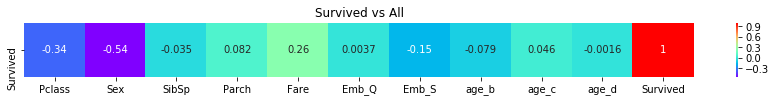

In [46]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr()['Survived'].values.reshape(1,-1),annot=True,xticklabels=df.corr()['Survived'].index.values,\
           yticklabels=['Survived'],cmap='rainbow')

plt.title('Survived vs All')

Text(0.5, 1, 'Fare vs All')

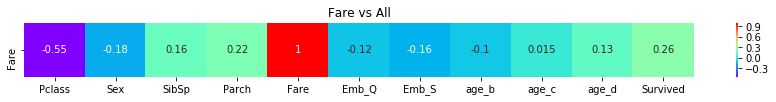

In [47]:
plt.figure(figsize=(15,1))
sns.heatmap(df.corr()['Fare'].values.reshape(1,-1),annot=True,xticklabels=df.corr()['Fare'].index.values,\
           yticklabels=['Fare'],cmap='rainbow')
plt.title('Fare vs All')

In [48]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [54]:
X,y=df.iloc[:,:-1].copy(),df.iloc[:,-1].copy()

## Modeling

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

In [80]:
strat=StratifiedShuffleSplit(1,test_size=0.25,random_state=0)

In [81]:
for each in strat.split(X,y):
    X_train,y_train,X_test,y_test=X.iloc[each[0]],y.iloc[each[0]],X.iloc[each[1]],y.iloc[each[1]]

In [82]:
X_train.shape

(668, 10)

In [83]:
X_test.shape

(223, 10)

In [84]:
from sklearn.preprocessing import StandardScaler

x_scale=StandardScaler()

X_train=pd.DataFrame(x_scale.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(x_scale.transform(X_test),columns=X_test.columns)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_clf=LogisticRegression()

In [94]:
log_clf.fit(X_train,y_train)

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
train_pred=log_clf.predict(X_train)
test_pred=log_clf.predict(X_test)

In [141]:
log_clf.classes_

array([0, 1], dtype=int64)

In [102]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,log_loss,jaccard_score,f1_score

In [129]:
def printTrainTestMetrics(ytrain,ytest,ytrain_hat,ytest_hat) :
    
    train,test=[],[]
    
    train.append(accuracy_score(ytrain,ytrain_hat))
    train.append(precision_score(ytrain,ytrain_hat))
    train.append(recall_score(ytrain,ytrain_hat))
    train.append(f1_score(ytrain,ytrain_hat))
    train.append(jaccard_score(ytrain,ytrain_hat))
    train.append(log_loss(ytrain,ytrain_hat)/len(ytrain))
    
    test.append(accuracy_score(ytest,ytest_hat))
    test.append(precision_score(ytest,ytest_hat))
    test.append(recall_score(ytest,ytest_hat))
    test.append(f1_score(ytest,ytest_hat))
    test.append(jaccard_score(ytest,ytest_hat))
    test.append(log_loss(ytest,ytest_hat)/len(ytest))
    
    result=pd.DataFrame()
    result['Train']=train
    result['Test']=test
    result.index=['Accuracy','Precision','Recall','F1 score','Jaccard score','Log Loss']
    
    return result

In [130]:
printTrainTestMetrics(y_train,y_test,train_pred,test_pred)

,Train,Test
Accuracy,0.803892,0.780269
Precision,0.757202,0.746667
Recall,0.718750,0.651163
F1 score,0.737475,0.695652
Jaccard score,0.584127,0.533333
Log Loss,0.010140,0.034033


#### log_loss=[-y * log(y_hat)-(1-y) * log(1-y_hat)]

In [139]:
plt.style.use('ggplot')

In [134]:
from sklearn.metrics import precision_recall_curve

In [153]:
def Prec_Recall_curve(y_act,y_hat_proba) :
    
    p,r,t=precision_recall_curve(y_act,y_hat_proba)

    plt.figure(figsize=(7,5))
    plt.plot(t,p[:-1],'r-',label='Precision')
    plt.plot(t,r[:-1],'g--',label='recall')
    plt.title('Precision vs Recall')
    plt.xlabel('Threshold')
    plt.legend()

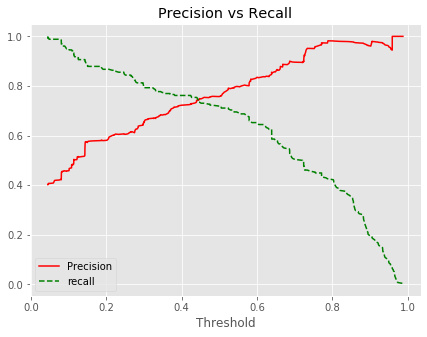

In [154]:
Prec_Recall_curve(y_train,log_clf.predict_proba(X_train)[:,1])

In [172]:
from sklearn.svm import SVC,LinearSVC

In [173]:
#svc_clf=SVC(kernel='linear',probability=True)
svc_clf=LinearSVC()

In [174]:
svc_clf.fit(X_train,y_train)

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [175]:
svc_clf.classes_

array([0, 1], dtype=int64)

In [176]:
train_pred=svc_clf.predict(X_train)
#train_pred_proba=svc_clf.predict_proba(X_train)[:,1]
train_pred_proba=svc_clf.decision_function(X_train)
test_pred=svc_clf.predict(X_test)

In [177]:
printTrainTestMetrics(y_train,y_test,train_pred,test_pred)

,Train,Test
Accuracy,0.805389,0.793722
Precision,0.771552,0.770270
Recall,0.699219,0.662791
F1 score,0.733607,0.712500
Jaccard score,0.579288,0.553398
Log Loss,0.010062,0.031949


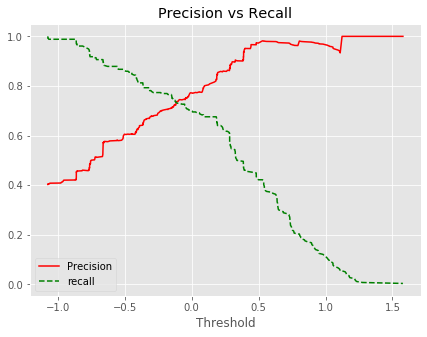

In [178]:
Prec_Recall_curve(y_train,train_pred_proba)